In [1]:
import numpy as np
import pandas as pd
import random
import pickle
import csv
import sklearn

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler 
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
from pathlib import Path

from datetime import datetime

In [2]:
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 10})

In [3]:
TRAIN_DATASET_PATH = 'course_project_train.csv'
TEST_DATASET_PATH = 'course_project_test.csv'

In [4]:
TRAIN_DATASET_PATH = 'D:/task/course_project_train.csv'
TEST_DATASET_PATH = 'D:/task/course_project_test.csv'

## Описание задачи
### Цель - построить модель для прогнозирования невыполнения долговых обязательств по текущему кредиту

#### Целевая переменная
##### Credit Default - факт невыполнения кредитных обязательств

## Описание датасета
#### Home Ownership - домовладение
#### Annual Income - годовой доход
#### Years in current job - количество лет на текущем месте работы
#### Tax Liens - налоговые обременения
#### Number of Open Accounts - количество открытых счетов
#### Years of Credit History - количество лет кредитной истории
#### Maximum Open Credit - наибольший открытый кредит
#### Number of Credit Problems - количество проблем с кредитом
#### Months since last delinquent - количество месяцев с последней просрочки платежа
#### Bankruptcies - банкротства
#### Purpose - цель кредита
#### Term - срок кредита
#### Current Loan Amount - текущая сумма кредита
#### Current Credit Balance - текущий кредитный баланс
#### Monthly Debt - ежемесячный долг
#### Credit Score - кредитный рейтинг
#### Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)


### Загрузка данных

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [6]:
df_test = pd.read_csv(TEST_DATASET_PATH)
df_test.tail()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
2495,Home Mortgage,1020053.0,10+ years,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,Home Mortgage,NaN,2 years,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,NaN
2497,Home Mortgage,1171806.0,2 years,0.0,48.0,12.8,1706430.0,0.0,NaN,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,Rent,723520.0,10+ years,0.0,14.0,28.8,945780.0,0.0,NaN,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0
2499,Rent,1694439.0,10+ years,0.0,12.0,18.4,1199748.0,1.0,72.0,0.0,debt consolidation,Long Term,763004.0,559531.0,23440.0,6820.0


### Обзор данных

In [7]:
print('Строк в трейне:', train_df.shape[0])
print('Строк в тесте:', df_test.shape[0])

Строк в трейне: 7500
Строк в тесте: 2500


In [8]:
train_df.shape


(7500, 17)

In [9]:
df_test.shape

(2500, 16)

In [10]:
train_df.iloc[6001]

Home Ownership                            Own Home
Annual Income                             803928.0
Years in current job                       9 years
Tax Liens                                      0.0
Number of Open Accounts                       10.0
Years of Credit History                       17.7
Maximum Open Credit                       422136.0
Number of Credit Problems                      0.0
Months since last delinquent                  24.0
Bankruptcies                                   0.0
Purpose                         debt consolidation
Term                                    Short Term
Current Loan Amount                        54120.0
Current Credit Balance                      1463.0
Monthly Debt                               15878.0
Credit Score                                 734.0
Credit Default                                   1
Name: 6001, dtype: object

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

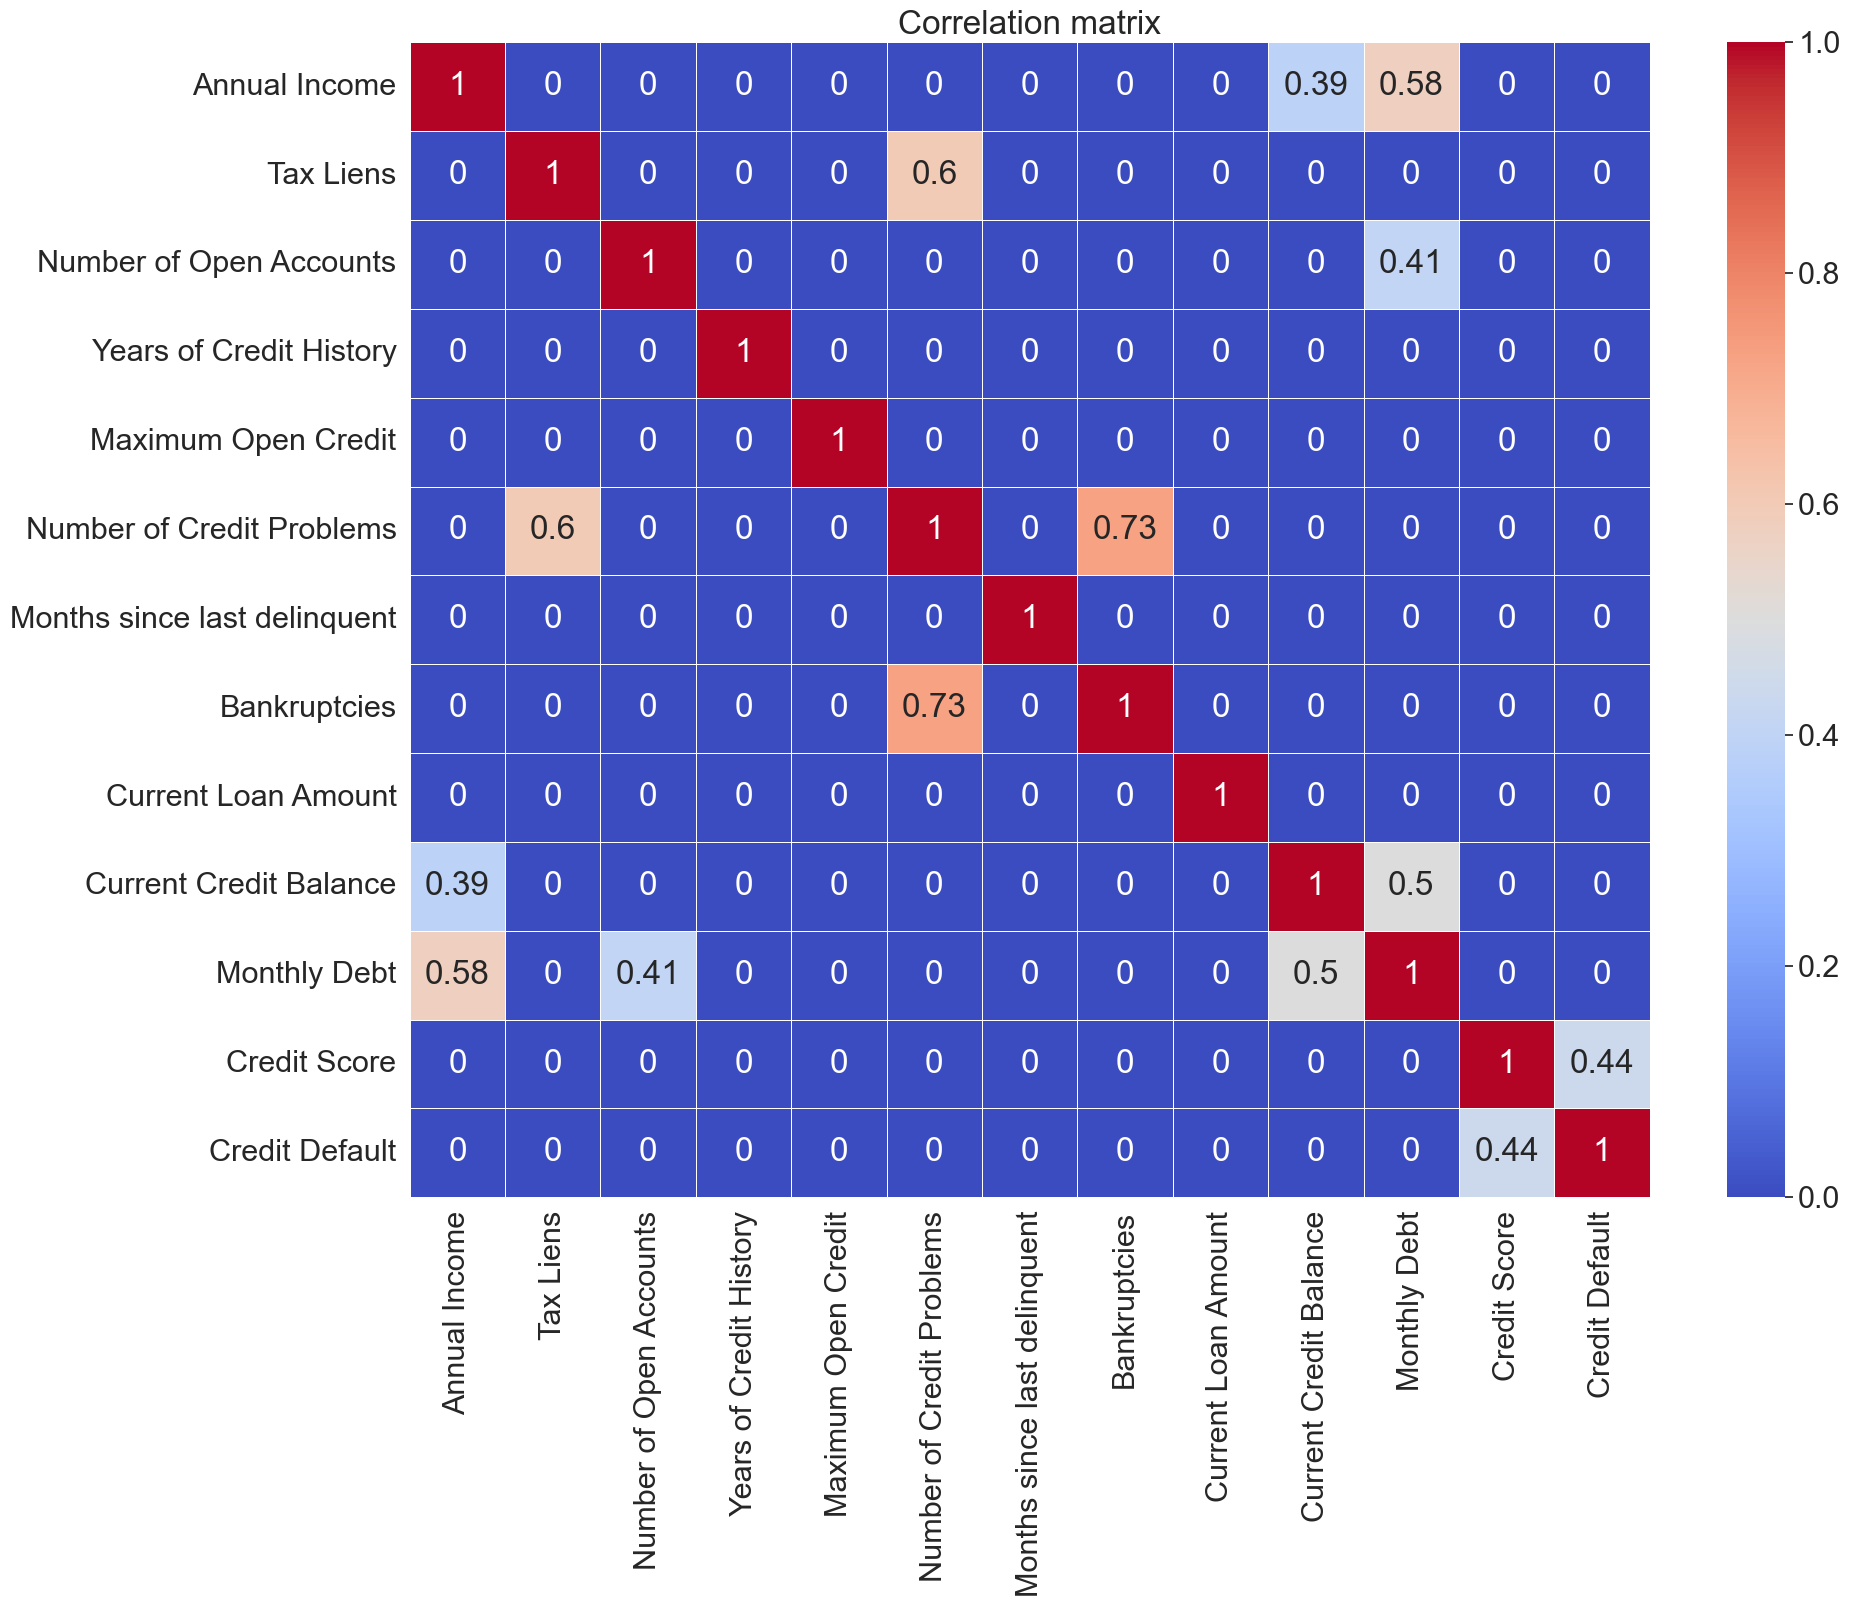

In [12]:
plt.figure(figsize = (20, 15))

sns.set(font_scale=2.0)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, lw=0.5, cmap = 'coolwarm')

plt.title('Correlation matrix')
plt.show()

##### Обзор количественных признаков

In [13]:
train_df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


#### Приведение типов

In [14]:
train_df.dtypes

Home Ownership                   object
Annual Income                   float64
Years in current job             object
Tax Liens                       float64
Number of Open Accounts         float64
Years of Credit History         float64
Maximum Open Credit             float64
Number of Credit Problems       float64
Months since last delinquent    float64
Bankruptcies                    float64
Purpose                          object
Term                             object
Current Loan Amount             float64
Current Credit Balance          float64
Monthly Debt                    float64
Credit Score                    float64
Credit Default                    int64
dtype: object

##### Приведение категориальных данных к строковому типу, чтобы модель не обучалась на них

In [15]:

for colname in ['Home Ownership', 'Years in current job', 'Purpose', 'Term']:
    train_df[colname] = train_df[colname].astype(str)

##### Обзор номинативных признаков

In [16]:
for cat_colname in train_df.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(train_df[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
nan           371
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses 

### Обработка пропусков 

In [17]:
train_df.isna().sum()

Home Ownership                     0
Annual Income                   1557
Years in current job               0
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
dtype: int64

#### текущий анализ датасета:

Пропуски в "Months since last delinquent" возможно показывают, что на текущий момент просроченная задолжность отсутствует. NaN заменяется 0. Добавляется новый бинарный признак - 1/0 (задолженость/отсутствие задолженности).

Пропуски в "Annual Income" могут свидетельствовать о неизвестном доходе. Данный критерий важен для анализа платежеспособности заемщика. Пропуски заменяются на медиану и определяется новое значение 0 (неизвестный доход).

"Bankruptcies" и "Number of Credit Problems" сильно коррелируют (0,73), 
поэтому один из них необходимо удалить, чтобы избежать проблемы мультиколлинеарности. 
Поскольку "Number of Credit Problems" имеет значительную корреляцию с "Tax Liens"(0.6),
мы удалим ее из train, а следовательно, и из test

##### Обработка "Months since last delinquent"

In [18]:
# Добавляется новый бинарный признак - 1/0 (задолженость/отсутствие задолженности)
train_df['has_delay'] = 1
train_df.loc[(train_df['Months since last delinquent'] == 0), 'has_delay'] = 0

# Заменяется пропуск NaN на 0 в 'Months since last delinquent'
train_df['Months since last delinquent'].fillna(0, inplace=True)

##### Обработка "Annual Income"

In [19]:
   # Добавляется новый бинарный признак о неизвестном доходе 1/0 (доход известен/доход не известен)
train_df['unknown_income'] = 0

   # В новую переменную annual_income_median записывается медианное значение дохода
annual_income_median = train_df['Annual Income'].median()

train_df.loc[(train_df['Annual Income'].isnull()), 'unknown_income'] = 1

   # Пропуски дохода заполняются медианным значением
train_df['Annual Income'].fillna(annual_income_median, inplace=True)

##### Обработка "Number of Credit Problems"

In [20]:
 train_df = train_df.drop(['Number of Credit Problems'], axis=1)

##### Обработка "Credit Score"

In [22]:
   # Добавляется новая переменная unknown_credit_score по неизвестному Credit Score с присвоением 0 всем наблюдениям 
train_df['unknown_credit_score'] = 0

   # В переменную credit_score_median записывается медианное значение рейтинга
credit_score_median = train_df['Credit Score'].median()

   # По известному кредитному рейтингу присваивается 1 в переменной unknown_credit_score
train_df.loc[(train_df['Credit Score'].isnull()), 'unknown_credit_score'] = 1

   # Пропуски рейтинга заполняются медианным значением
train_df['Credit Score'].fillna(credit_score_median, inplace=True)

##### Обработка "Bankruptcies"

In [23]:
train_df.Bankruptcies.value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

In [24]:
train_df['Bankruptcies'].fillna(0 , inplace=True)

In [25]:
train_df.Bankruptcies.value_counts()

0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

##### Обработка "Years in current job"

In [26]:
   # Уникальные значения Years in current job
unique_years_in_current_job = train_df['Years in current job'].unique()

var_experiance = unique_years_in_current_job[1:]

   # NaN заменяется на рандомный опыт
train_df['Years in current job'].fillna(random.choice(var_experiance), inplace=True)

In [27]:
train_df.isnull().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
has_delay                       0
unknown_income                  0
unknown_credit_score            0
dtype: int64

##### Обработка "Term"

In [28]:
train_df['term_binary'] = train_df['Term'].map({'Short Term':'1', 'Long Term':'0'}).astype(int)

### Обработка выбросов

##### Значение 99999999 в признаке "Current Loan Amount" вызывает сомнение в его корректности. Скорее всего это выброс.

In [29]:
# 99999999.0 в Current Loan Amount заменяются на медианные
median_current_loan_amount = train_df['Current Loan Amount'].median()
train_df.loc[(train_df['Current Loan Amount'] == 99999999.0), 
             'Current Loan Amount'] = median_current_loan_amount

##### Обработка "Credit Score"

In [30]:
train_df['Credit Score'].describe()

count    7500.000000
mean     1063.877333
std      1438.335832
min       585.000000
25%       718.000000
50%       731.000000
75%       740.000000
max      7510.000000
Name: Credit Score, dtype: float64

In [35]:
Credit_Score_max_value = np.quantile(train_df['Credit Score'], q = 0.90)
Credit_Score_max_value

745.0

In [36]:
condition = (train_df['Credit Score'] > Credit_Score_max_value)


In [37]:
train_df.loc[condition, 'Credit Score'] = train_df['Credit Score'].median()

In [38]:
train_df['Credit Score'].describe()

count    7500.000000
mean      721.814400
std        23.064644
min       585.000000
25%       718.000000
50%       731.000000
75%       731.000000
max       745.000000
Name: Credit Score, dtype: float64

##### Обработка "Monthly Debt"

In [39]:
train_df['Monthly Debt'].describe()

count      7500.000000
mean      18314.454133
std       11926.764673
min           0.000000
25%       10067.500000
50%       16076.500000
75%       23818.000000
max      136679.000000
Name: Monthly Debt, dtype: float64

In [40]:
Monthly_Debt_max_value = np.quantile(train_df['Monthly Debt'], q = 0.975)
Monthly_Debt_max_value

47950.149999999965

In [41]:
condition = (train_df['Monthly Debt'] > Monthly_Debt_max_value) 

In [42]:
train_df.loc[condition, 'Monthly Debt'] = train_df['Monthly Debt'].median()

In [43]:
train_df['Monthly Debt'].describe()

count     7500.000000
mean     17213.267067
std       9647.442830
min          0.000000
25%      10067.500000
50%      16075.750000
75%      22775.750000
max      47905.000000
Name: Monthly Debt, dtype: float64

In [44]:
train_df.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,has_delay,unknown_income,unknown_credit_score,term_binary
0,Own Home,482087.0,nan,0.0,11.0,26.3,685960.0,0.0,1.0,debt consolidation,Short Term,309573.0,47386.0,7914.0,731.0,0,1,0,0,1
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1,1,0,0,0
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,0.0,debt consolidation,Short Term,309573.0,308389.0,13651.0,742.0,0,1,0,0,1
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,0.0,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0,1,0,0,1
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,0.0,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0,1,0,0,1


### Анализ данных

##### Выделение целевой переменной и групп признаков

In [45]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = train_df.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = train_df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

#### Анализ целевой переменной

##### Обзор распределения значений целевой переменной

In [46]:
train_df['Credit Default'].value_counts()

0    5387
1    2113
Name: Credit Default, dtype: int64

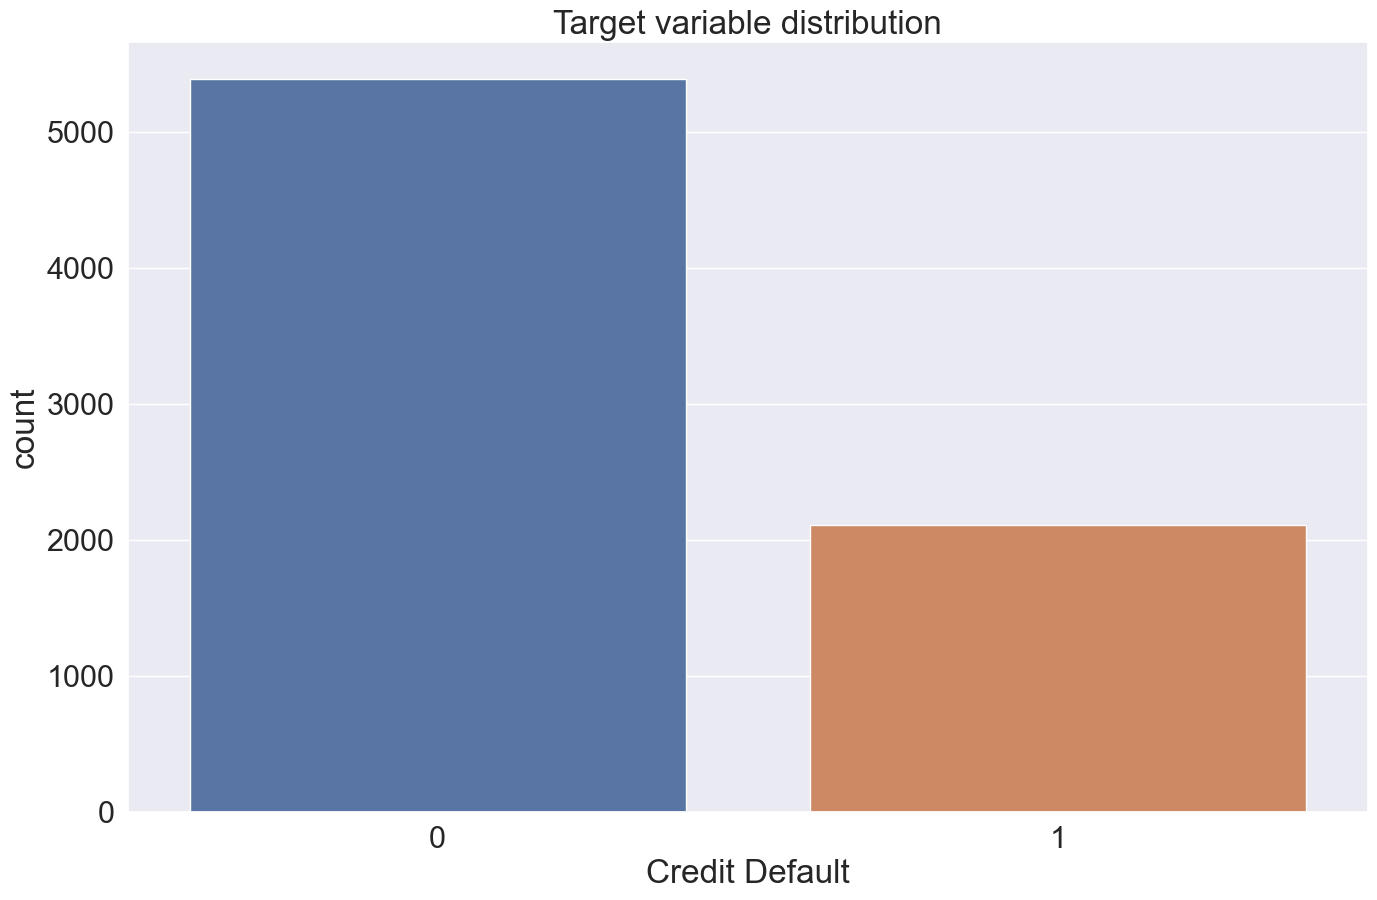

In [47]:
plt.figure(figsize=(16, 10))

sns.countplot(x=TARGET_NAME, data=train_df)

plt.title('Target variable distribution')
plt.show()

##### Корреляция с базовыми признаками

In [48]:
NEW_FEATURE_NAMES = ['has_delay','unknown_income','unknown_credit_score','term_binary']

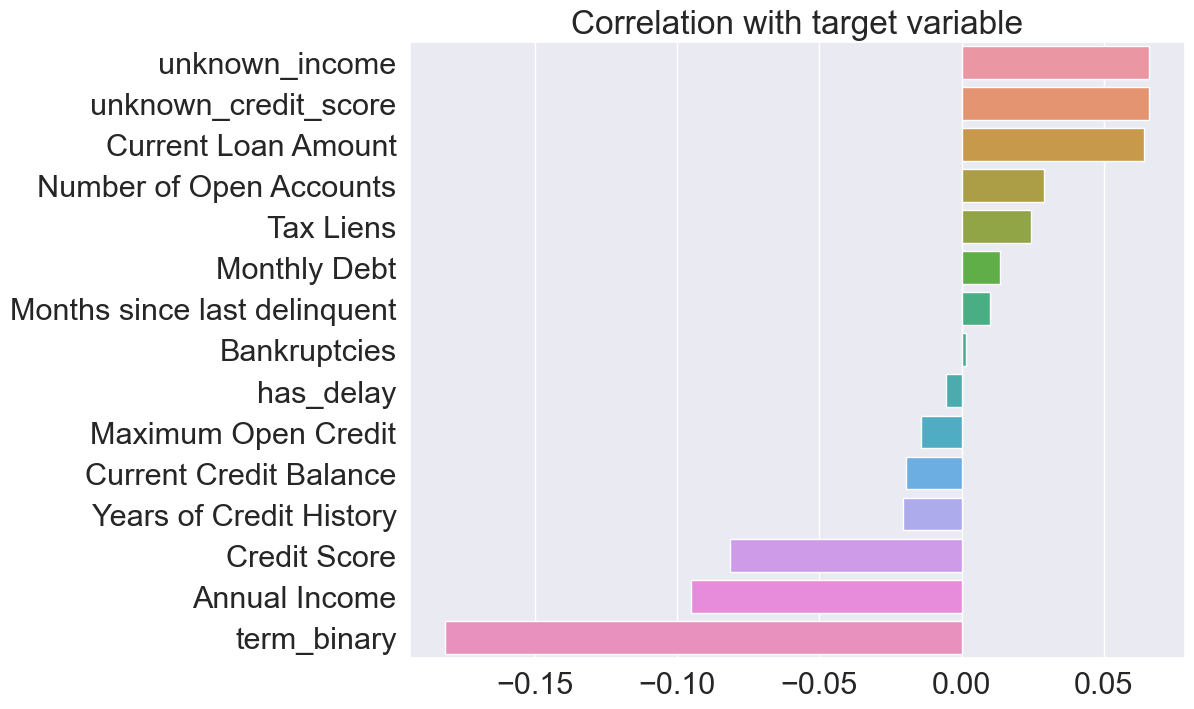

In [49]:
corr_with_target = train_df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

array([[<AxesSubplot:title={'center':'Annual Income'}>,
        <AxesSubplot:title={'center':'Tax Liens'}>,
        <AxesSubplot:title={'center':'Number of Open Accounts'}>,
        <AxesSubplot:title={'center':'Years of Credit History'}>],
       [<AxesSubplot:title={'center':'Maximum Open Credit'}>,
        <AxesSubplot:title={'center':'Months since last delinquent'}>,
        <AxesSubplot:title={'center':'Bankruptcies'}>,
        <AxesSubplot:title={'center':'Current Loan Amount'}>],
       [<AxesSubplot:title={'center':'Current Credit Balance'}>,
        <AxesSubplot:title={'center':'Monthly Debt'}>,
        <AxesSubplot:title={'center':'Credit Score'}>,
        <AxesSubplot:title={'center':'Credit Default'}>],
       [<AxesSubplot:title={'center':'has_delay'}>,
        <AxesSubplot:title={'center':'unknown_income'}>,
        <AxesSubplot:title={'center':'unknown_credit_score'}>,
        <AxesSubplot:title={'center':'term_binary'}>]], dtype=object)

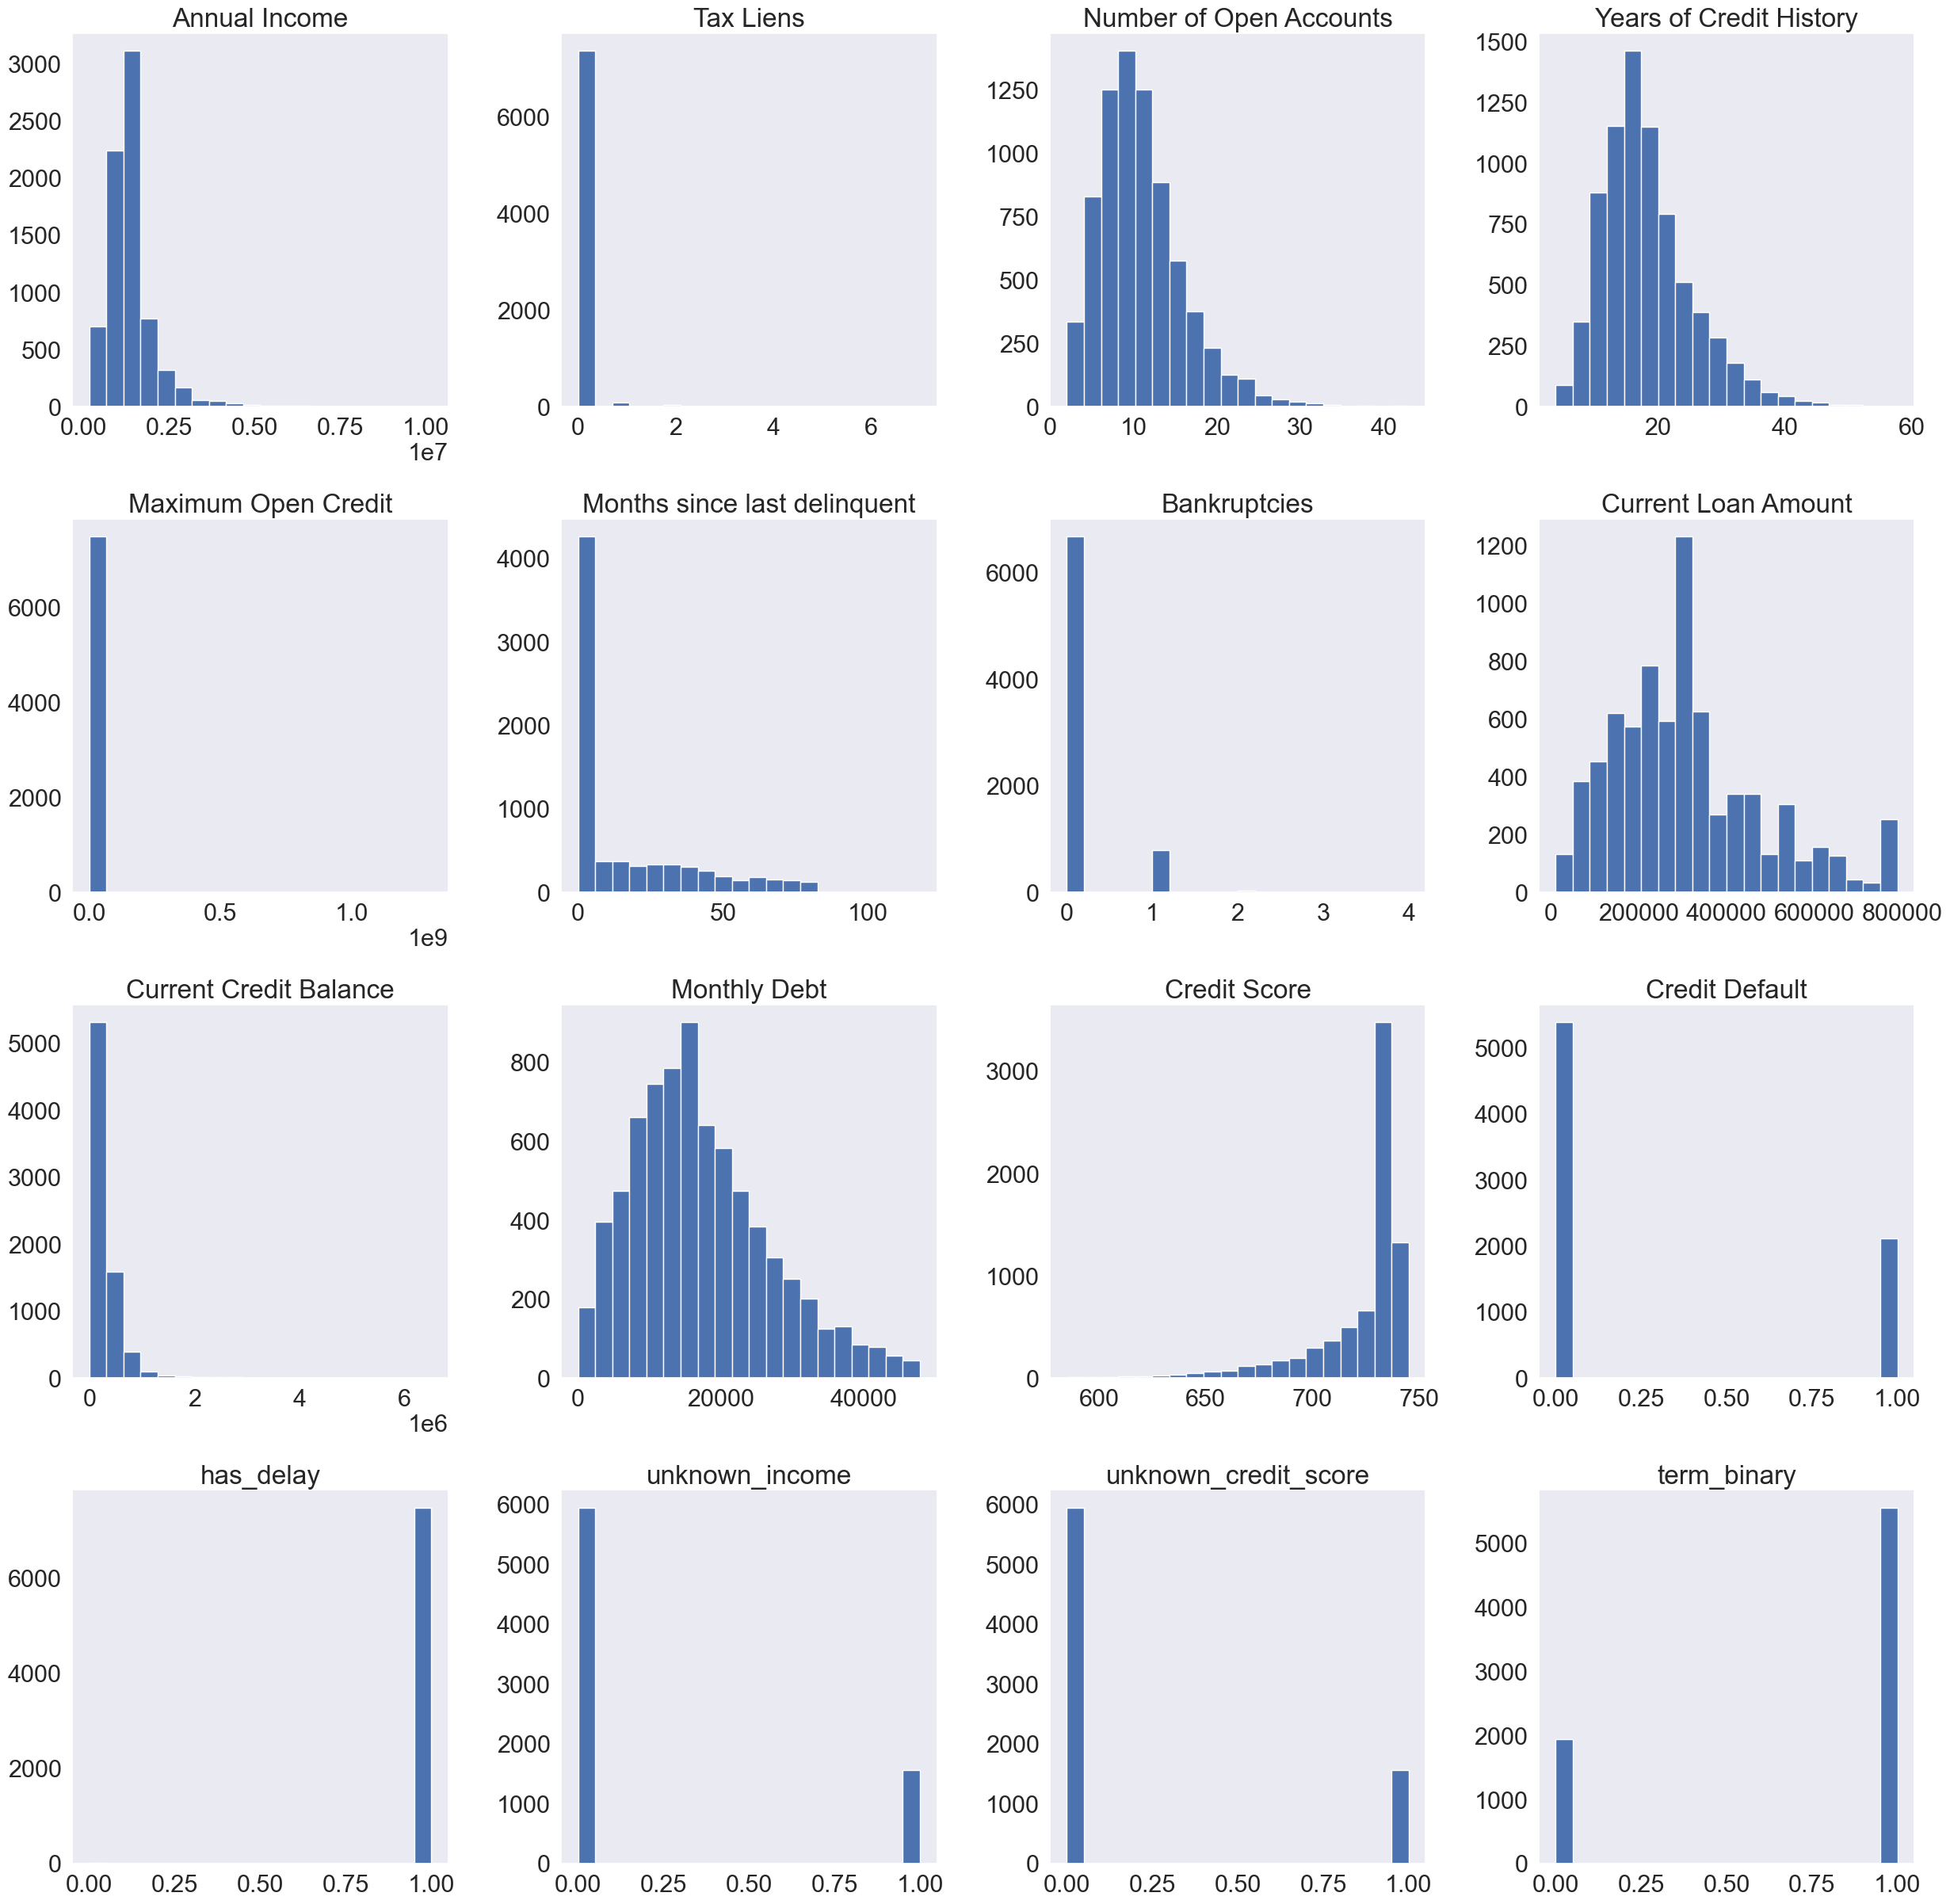

In [50]:
train_df.hist(figsize=(30,30), bins=20, grid=False)

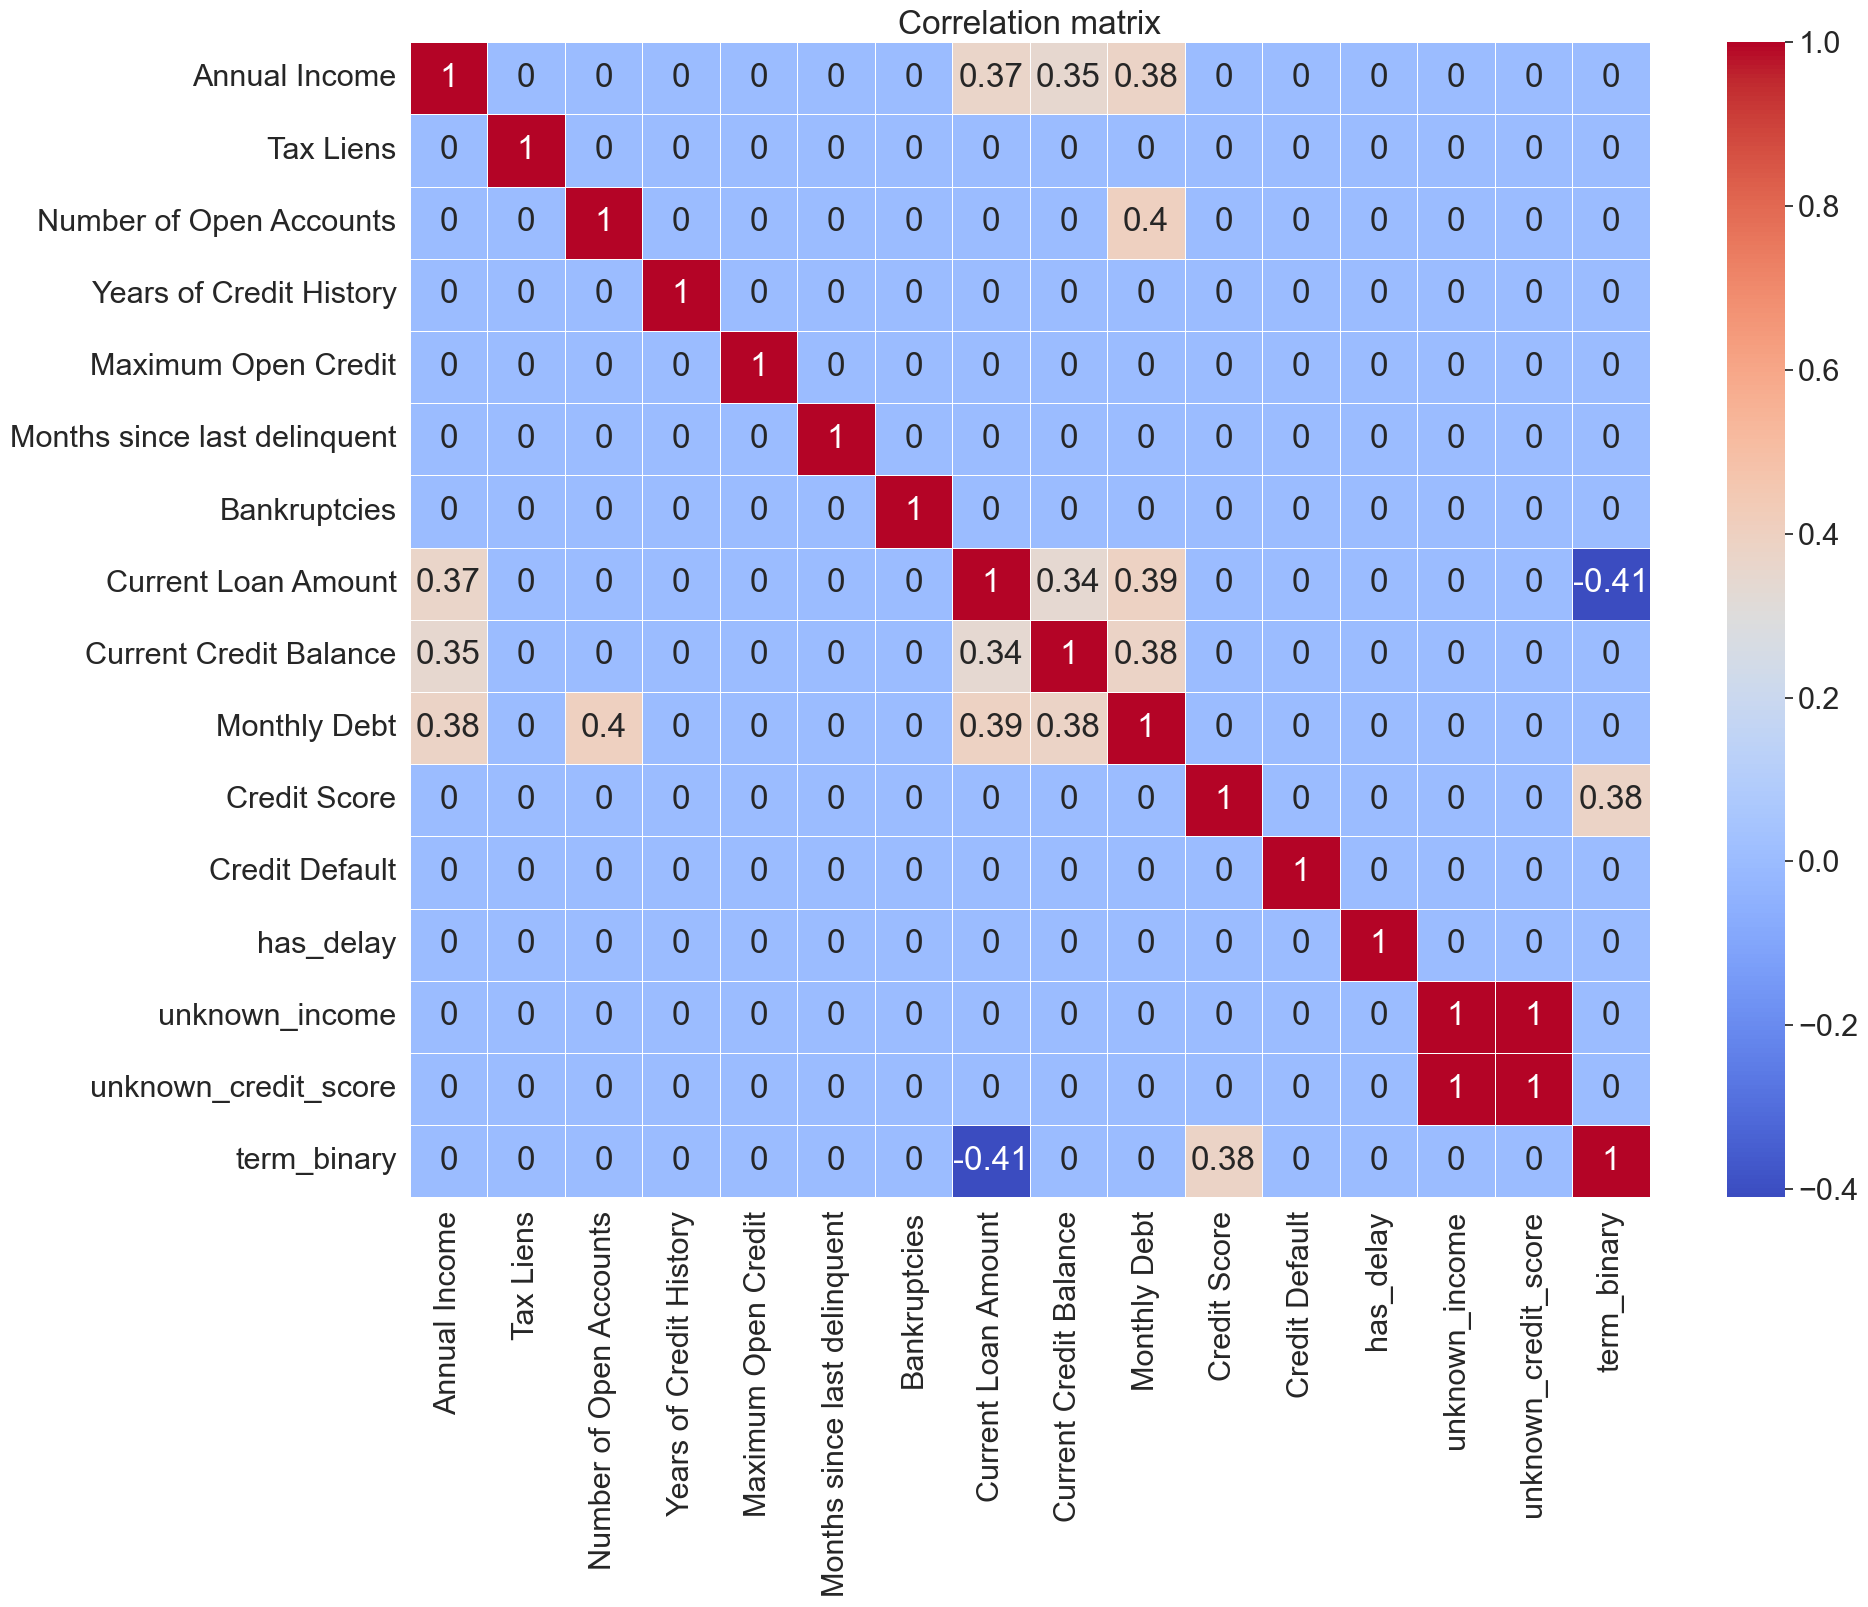

In [51]:
plt.figure(figsize = (20, 15))

sns.set(font_scale=2.0)

corr_matrix = train_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, lw=0.5, cmap = 'coolwarm')

plt.title('Correlation matrix')
plt.show()

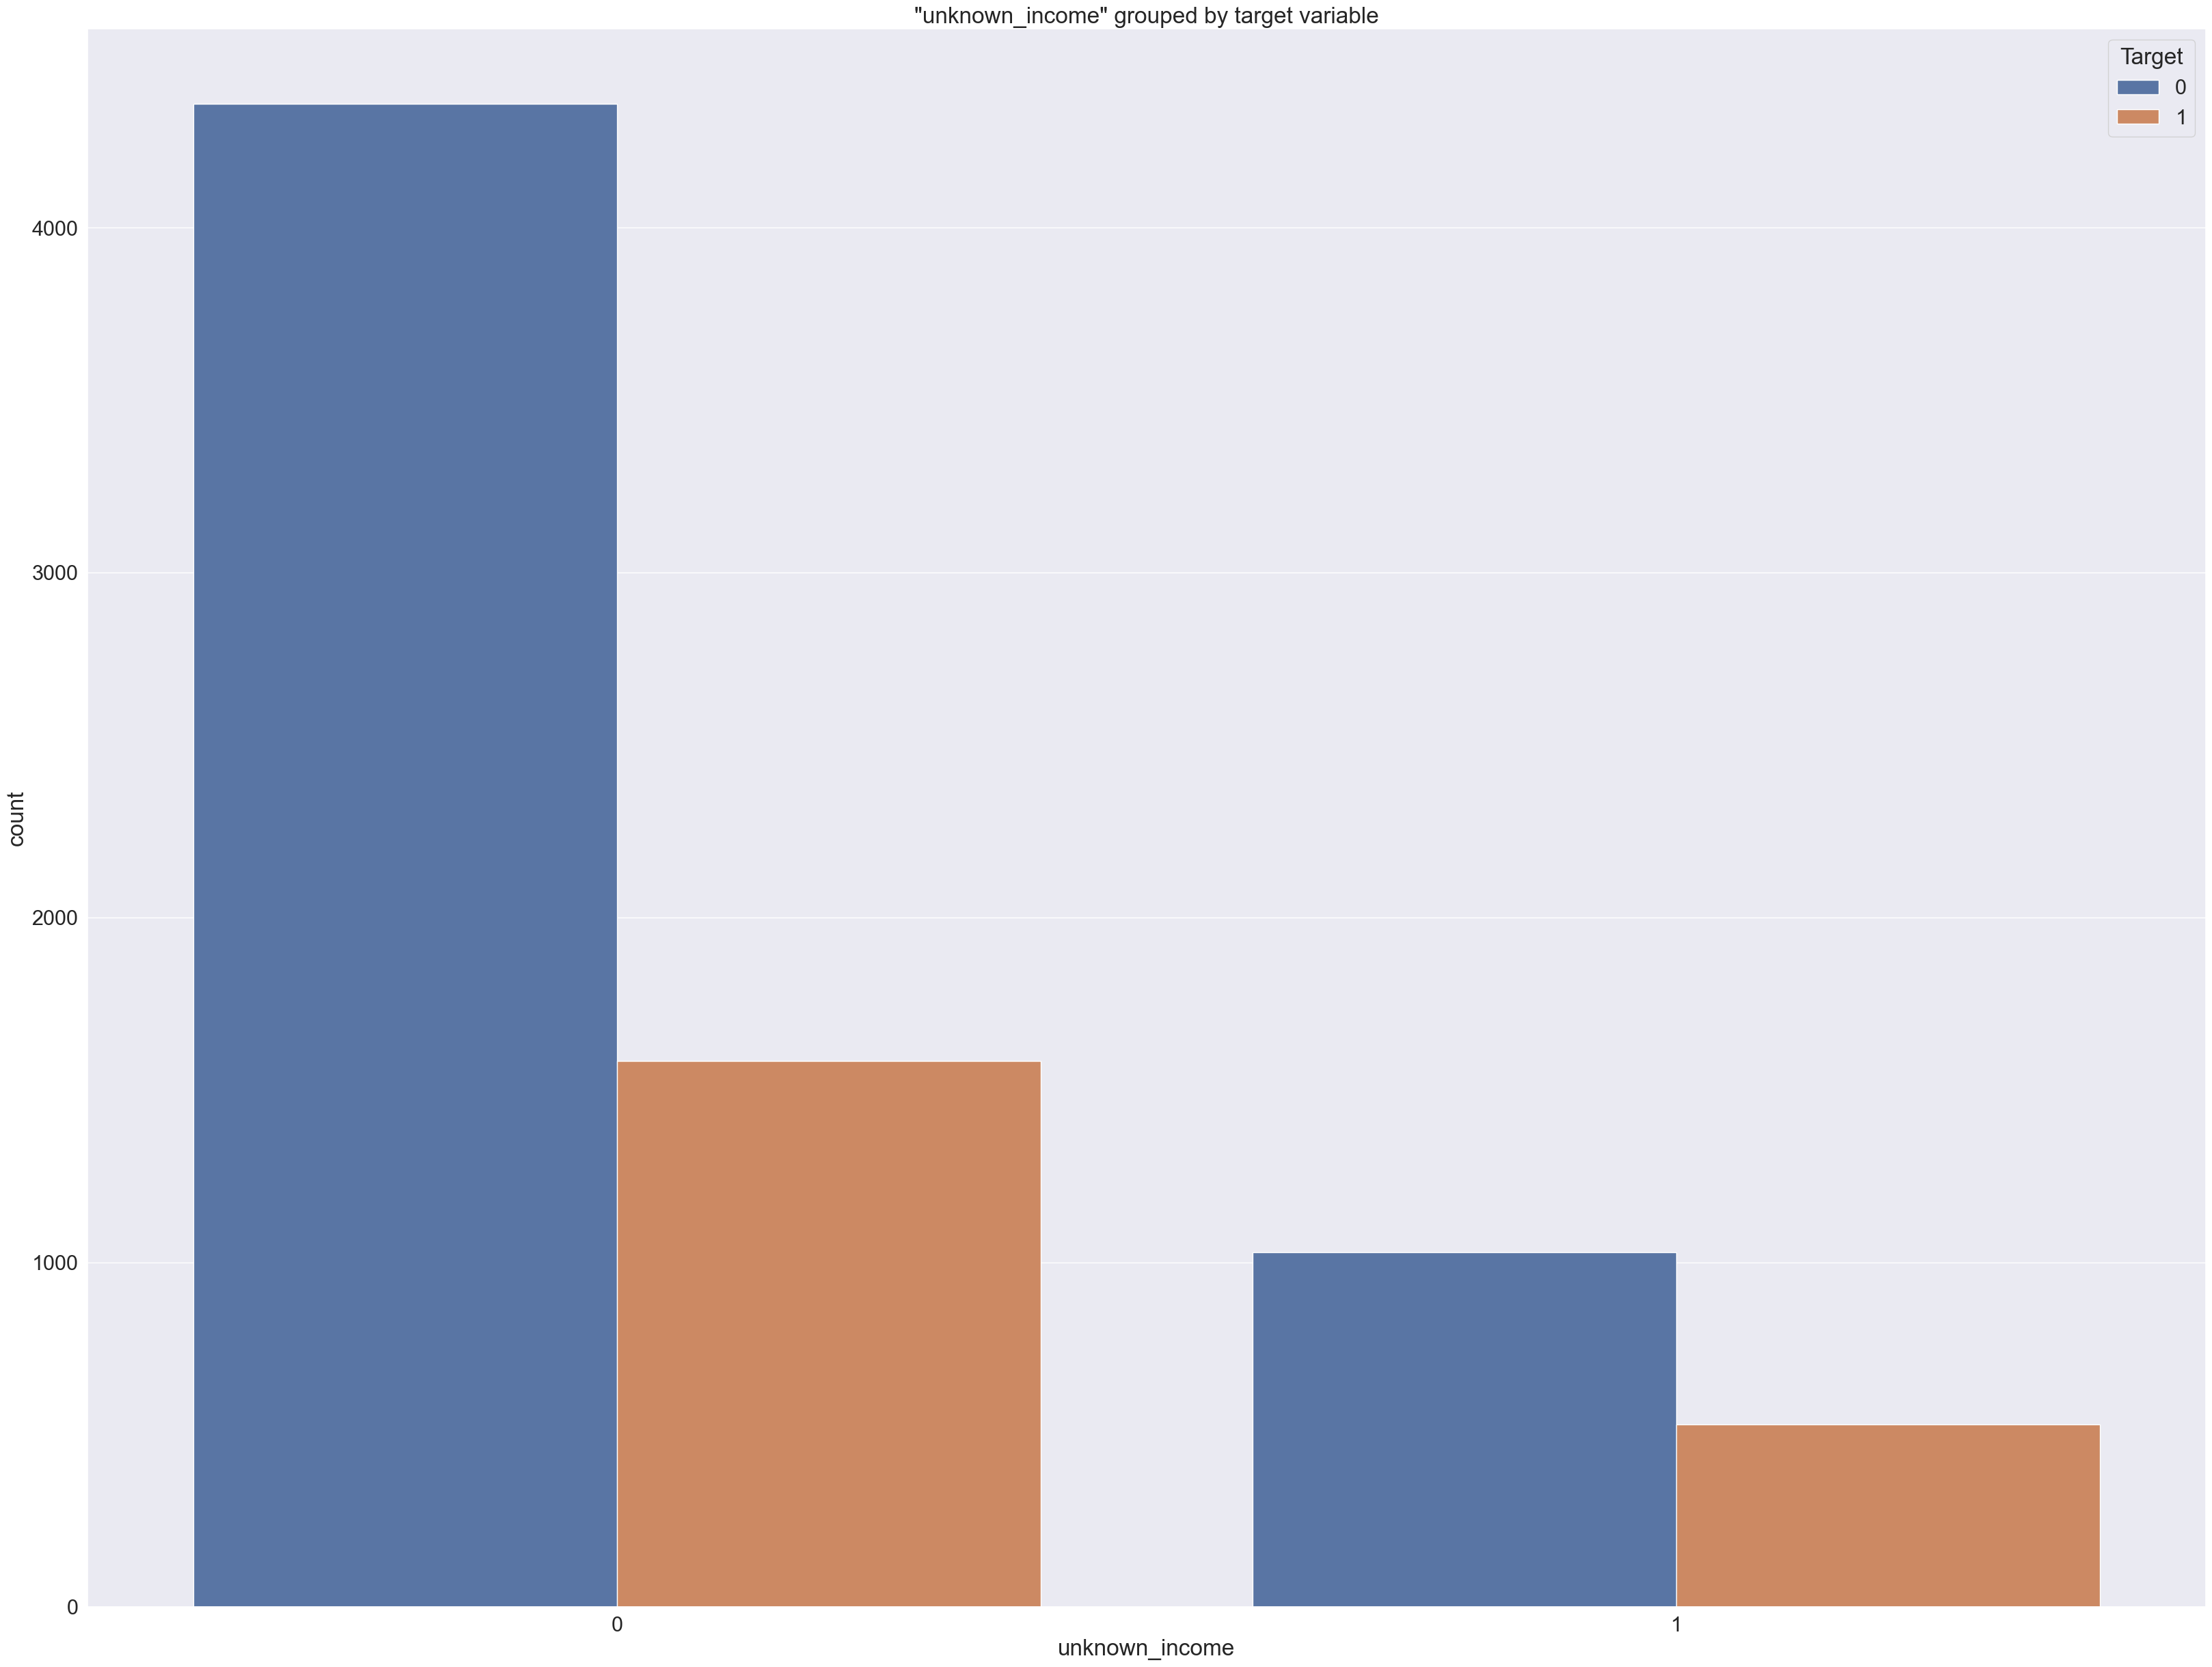

In [52]:
plt.figure(figsize=(40, 30))

sns.countplot(x="unknown_income", hue=TARGET_NAME, data=train_df)
plt.title('"unknown_income" grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

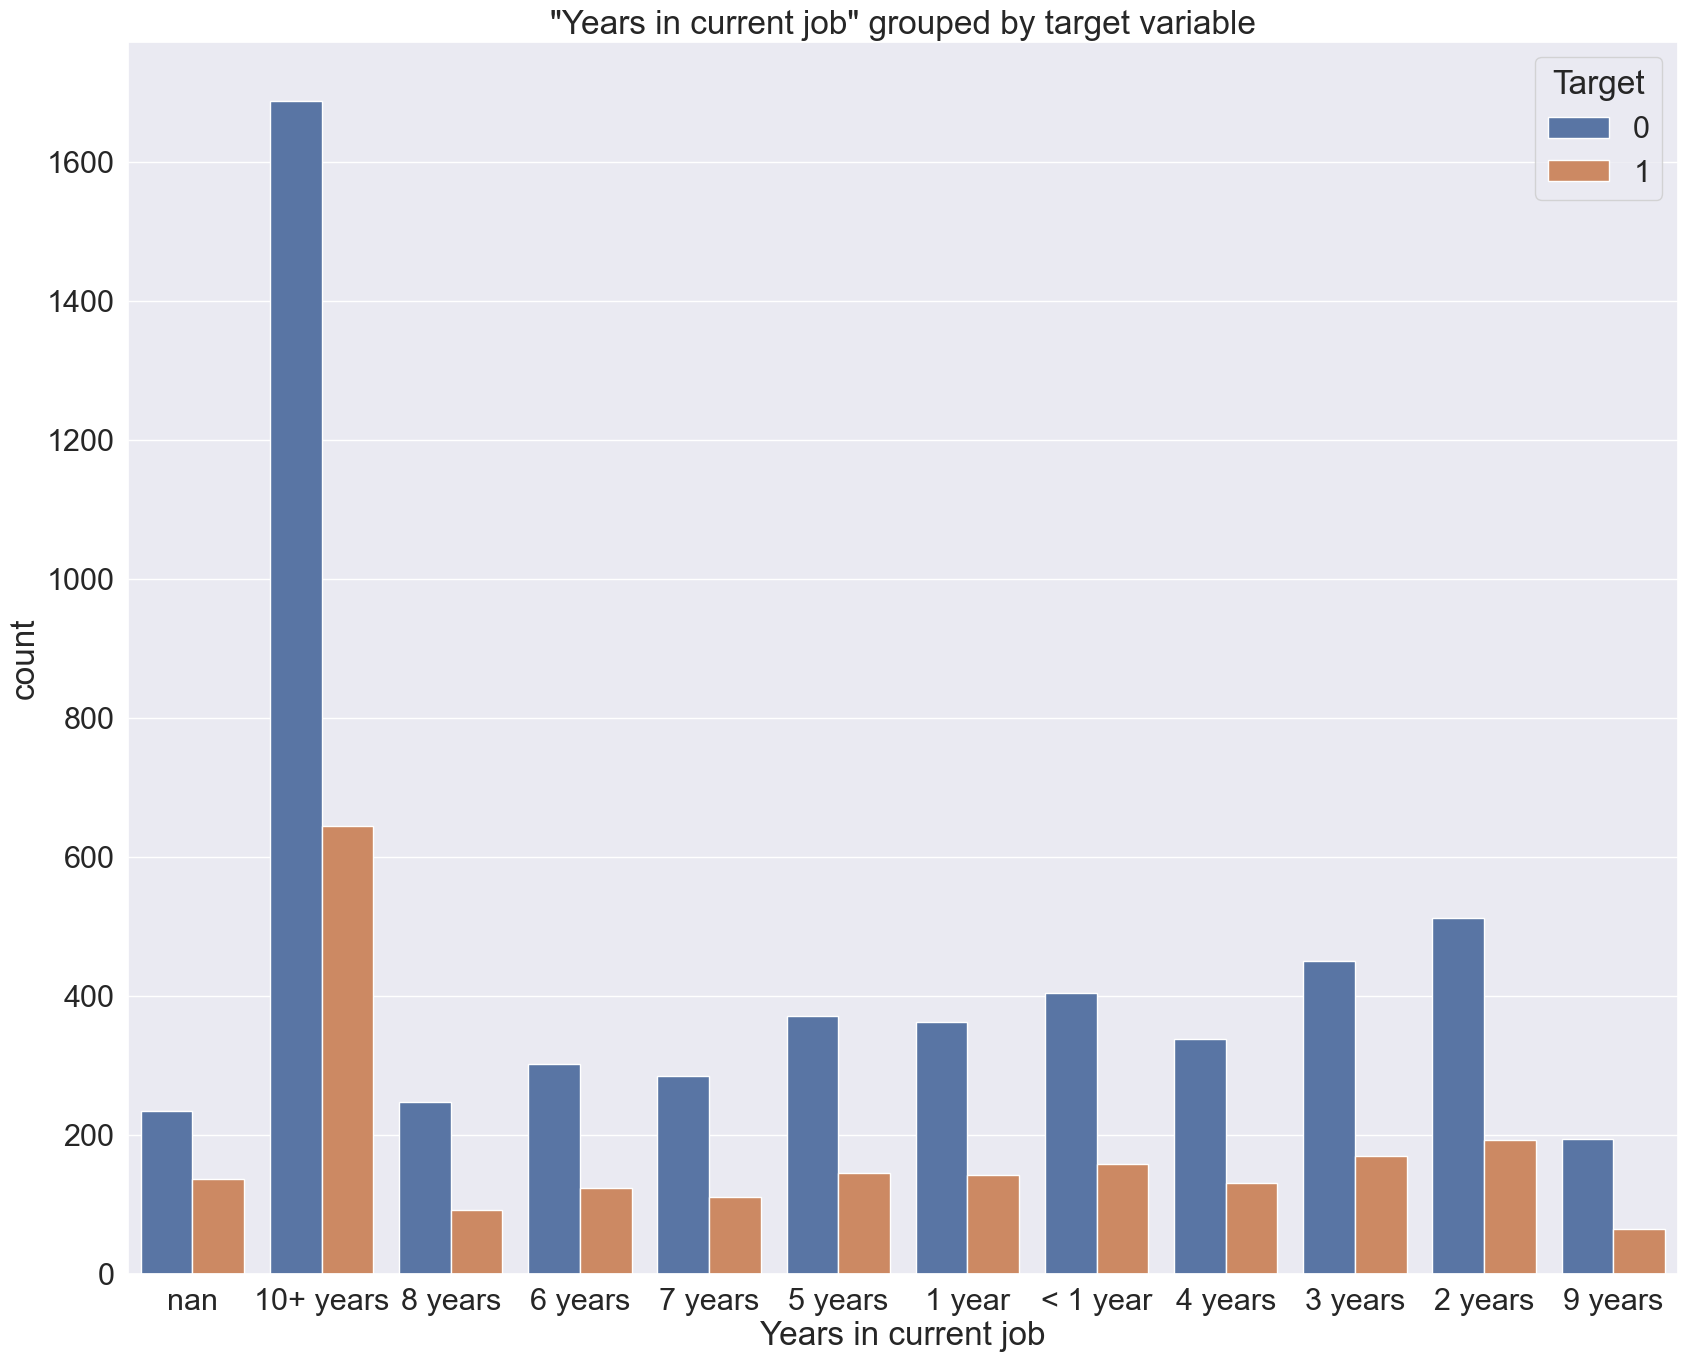

In [53]:
plt.figure(figsize=(20, 16))

sns.countplot(x="Years in current job", hue=TARGET_NAME, data=train_df)
plt.title('\"Years in current job\" grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

#####  Определение количества людей, в группах по стажу работы, не возвращающих кредит

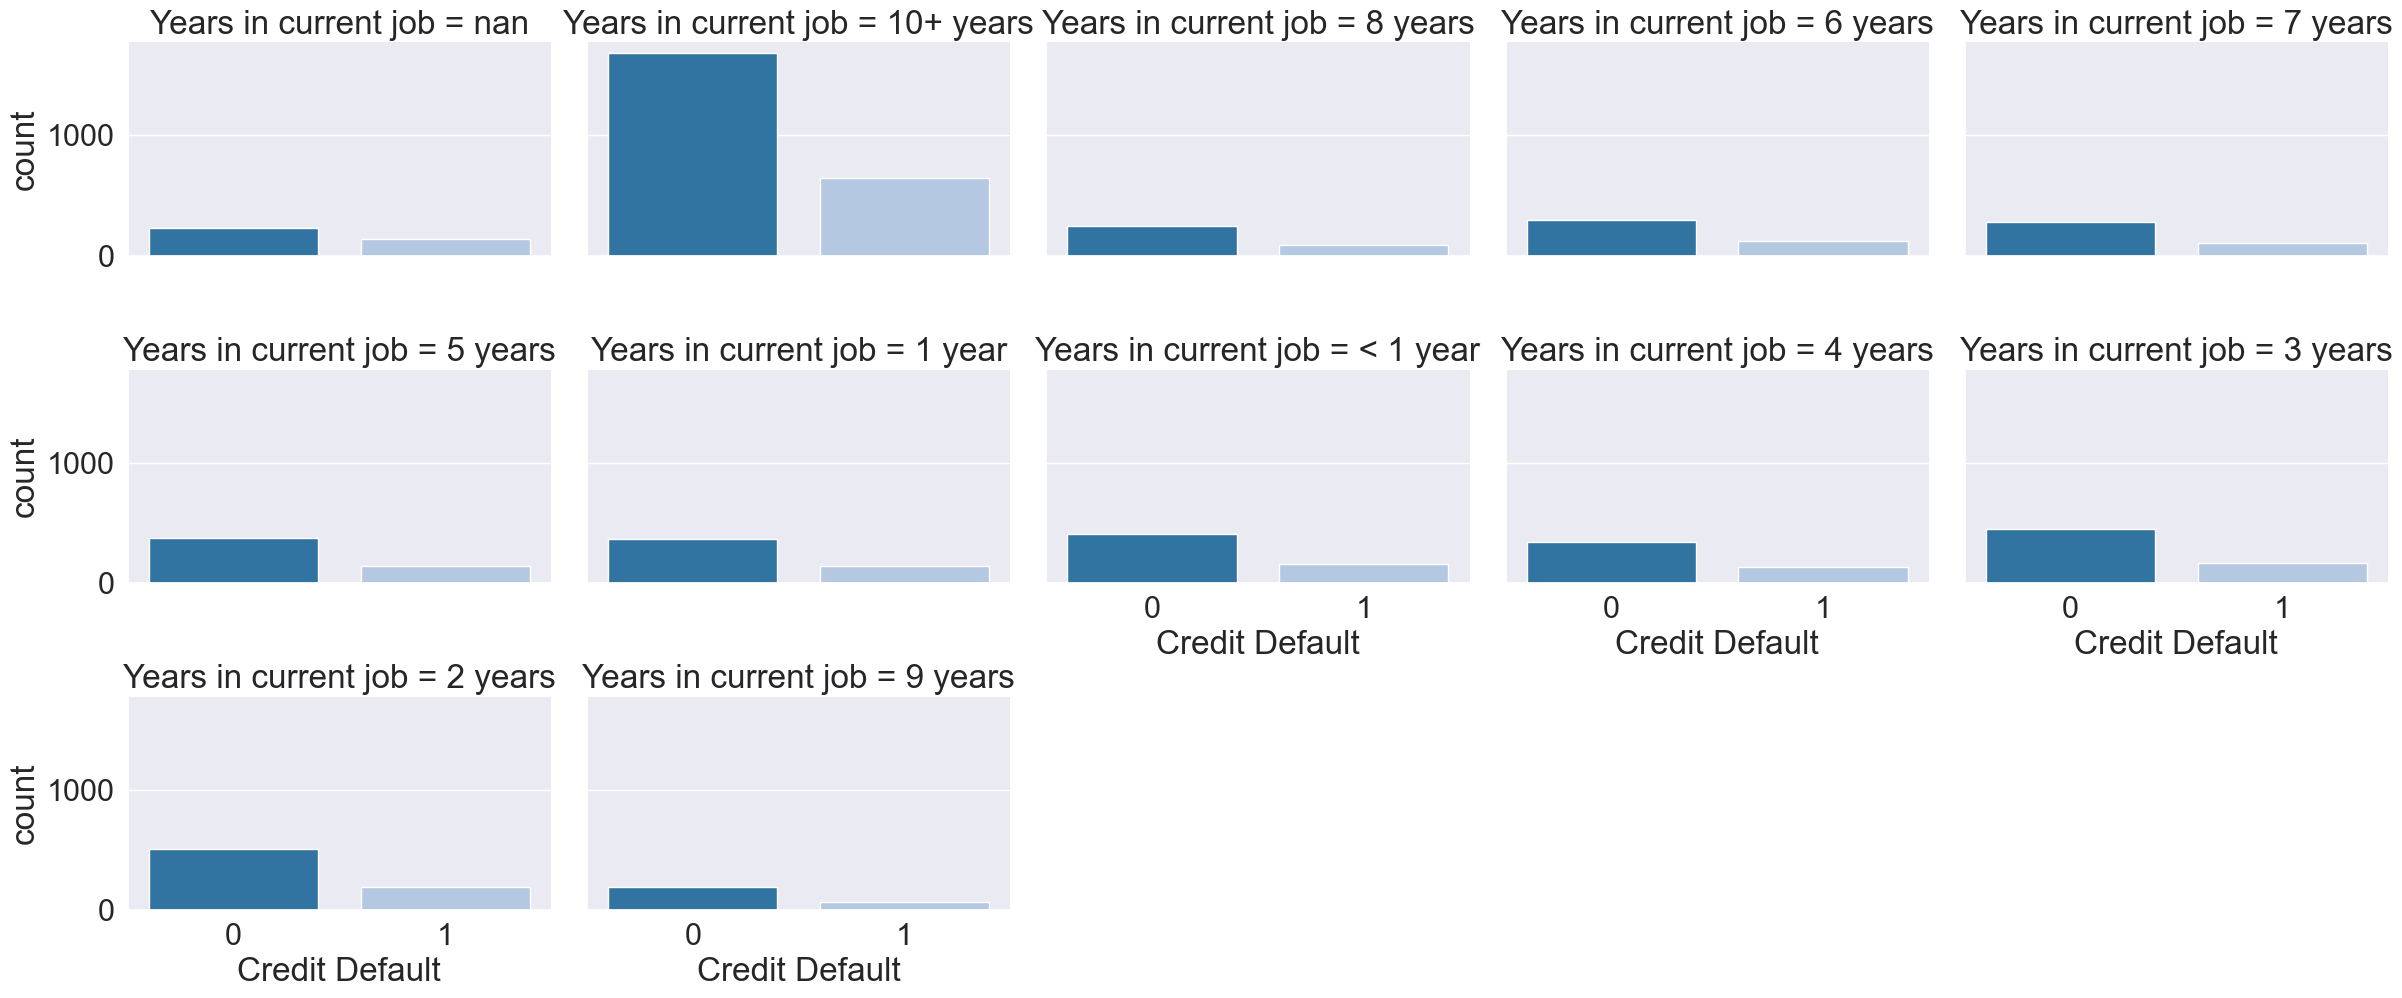

In [54]:
g = sns.catplot("Credit Default", col="Years in current job", col_wrap=5,
                data=train_df,
                kind="count", height=3.5, aspect=1.4, 
                palette='tab20')

#fig.suptitle('sf')
plt.show()

#### График зависимости величины кредита от годового дохода с нанесением целевого класса

<Figure size 1200x1200 with 0 Axes>

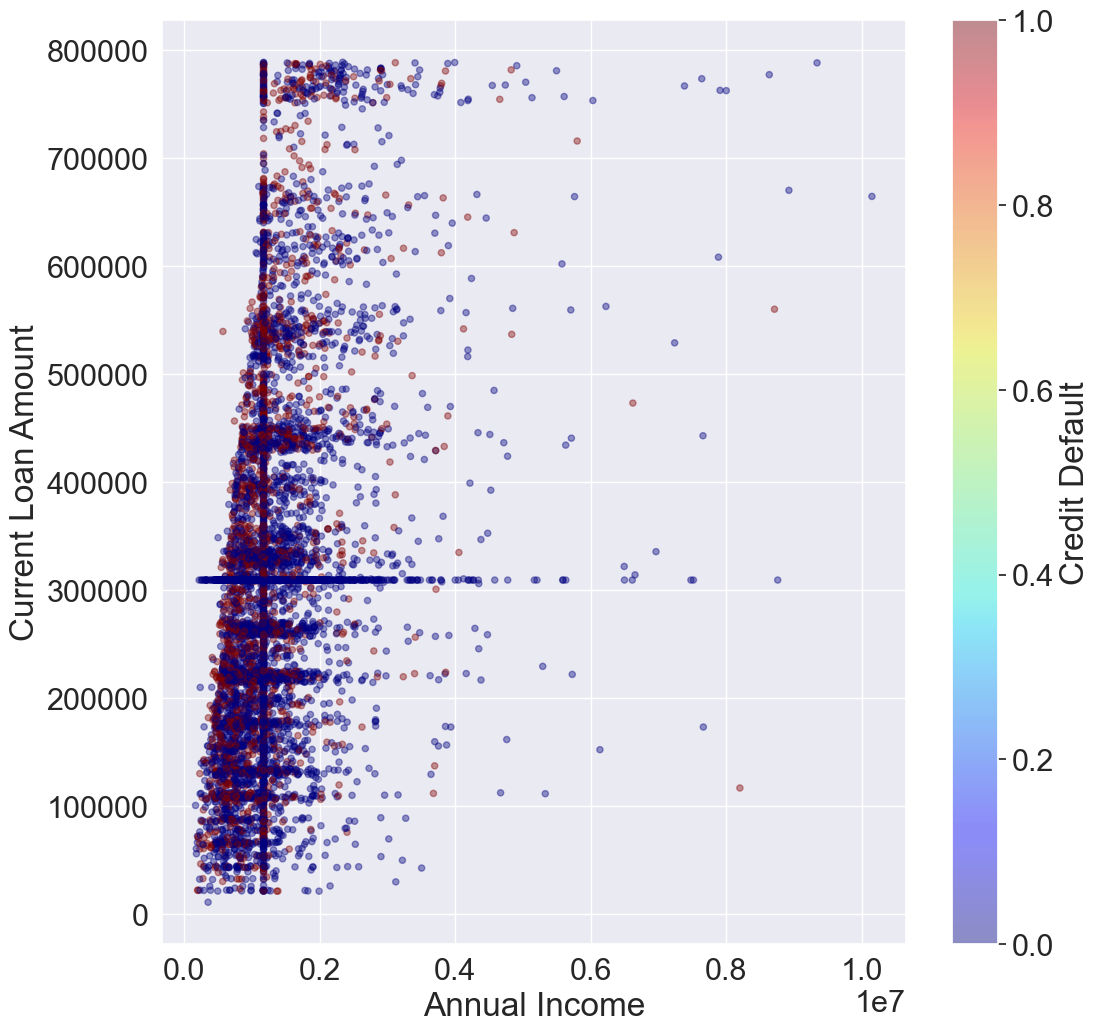

In [55]:
plt.figure(figsize=(12,12))
train_df.plot(kind="scatter", x="Annual Income", y="Current Loan Amount", alpha=0.4,
    c="Credit Default", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(12,12),
    sharex=False)
plt.grid(True)
plt.show()

#### Распределение величины кредита

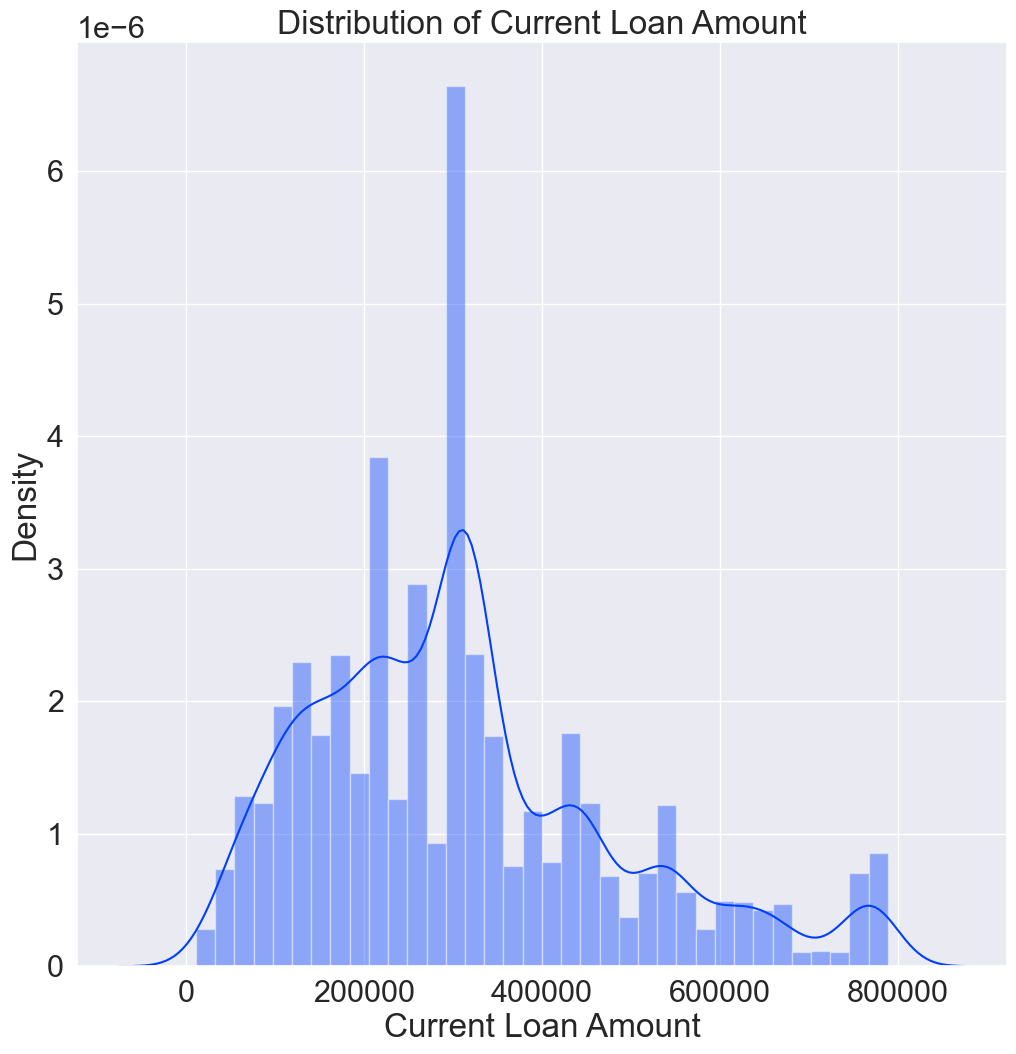

In [56]:
plt.style.use('seaborn-bright')
plt.figure(figsize=(12,12))
sns.distplot(train_df['Current Loan Amount'])
plt.title('Distribution of Current Loan Amount')
plt.grid(True)

In [57]:
train_df.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,has_delay,unknown_income,unknown_credit_score,term_binary
count,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,1.325286e+06,0.030133,11.130933,18.317467,9.451537e+05,15.815200,0.116933,309088.029067,2.898332e+05,17213.267067,721.814400,0.281733,0.997600,0.207600,0.207600,0.740800
std,7.567551e+05,0.271604,4.908924,7.041946,1.602622e+07,22.649441,0.346904,171393.740131,3.178714e+05,9647.442830,23.064644,0.449874,0.048934,0.405616,0.405616,0.438225
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,11242.000000,0.000000e+00,0.000000,585.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.311330e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,0.000000,180169.000000,1.142565e+05,10067.500000,718.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,0.000000,309567.500000,2.093230e+05,16075.750000,731.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.499974e+06,0.000000,14.000000,21.800000,7.935015e+05,29.000000,0.000000,396929.500000,3.604062e+05,22775.750000,731.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,118.000000,4.000000,789030.000000,6.506797e+06,47905.000000,745.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Отбор признаков

In [58]:
TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = train_df.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = train_df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

In [134]:
NEW_FEATURE_NAMES = ['has_delay','unknown_income','unknown_credit_score','term_binary']

In [135]:
NUMB_FEATURE_NAMES = ['Annual Income','Tax Liens','Number of Open Accounts','Years of Credit History',
                     'Maximum Open Credit','Months since last delinquent',
                     'Bankruptcies','Current Loan Amount','Current Credit Balance','Monthly Debt','Credit Score']
CAT_FEATURE_NAMES = ['Years in current job','Home Ownership','Purpose','Term']


In [136]:
SELECTED_FEATURE_NAMES = NUMB_FEATURE_NAMES + NEW_FEATURE_NAMES

X = train_df[SELECTED_FEATURE_NAMES]
y = train_df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=11)

##### Приведение типов для модели CatBoost

In [137]:
for colname in CAT_FEATURE_NAMES:
    train_df[colname] = pd.Categorical(train_df[colname])
    
train_df[CAT_FEATURE_NAMES].dtypes

Years in current job    category
Home Ownership          category
Purpose                 category
Term                    category
dtype: object

##### Нормализация данных

In [138]:
scaler = StandardScaler()

df_norm = train_df.copy()
df_norm[NUMB_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUMB_FEATURE_NAMES])

train_df = df_norm.copy()

##### Разбиение на train и test

In [139]:
X = train_df[SELECTED_FEATURE_NAMES]
y = train_df[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

In [65]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [66]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

### Балансировка целевой переменной

In [67]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    3771
1    2958
Name: Credit Default, dtype: int64

In [68]:
X_train = df_balanced.drop(columns=TARGET_NAME)
y_train = df_balanced[TARGET_NAME]

#### Сохранение обучающего и тестового датасетов

In [69]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [ ]:
train_df.to_csv(TRAIN_FULL_PATH, index=False, encoding='utf-8')
train.to_csv(TRAIN_PART_PATH, index=False, encoding='utf-8')
test.to_csv(TEST_PART_PATH, index=False, encoding='utf-8')

### Подбор моделей, получение бейзлана

## LogisticRegression

In [71]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.62      0.81      0.70      3771
           1       0.60      0.35      0.44      2958

    accuracy                           0.61      6729
   macro avg       0.61      0.58      0.57      6729
weighted avg       0.61      0.61      0.59      6729

TEST

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1616
           1       0.41      0.32      0.36       634

    accuracy                           0.68      2250
   macro avg       0.58      0.57      0.57      2250
weighted avg       0.66      0.68      0.66      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1314  302
1                428  206


## k ближайших соседей

In [72]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      3771
           1       0.73      0.66      0.70      2958

    accuracy                           0.75      6729
   macro avg       0.74      0.74      0.74      6729
weighted avg       0.74      0.75      0.74      6729

TEST

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1616
           1       0.33      0.36      0.35       634

    accuracy                           0.62      2250
   macro avg       0.54      0.54      0.54      2250
weighted avg       0.63      0.62      0.62      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1157  459
1                404  230


## XGBoost

In [73]:
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

In [74]:
import xgboost as xgb
import catboost as catb
import lightgbm as lgbm

from xgboost import XGBClassifier
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

In [75]:
model_xgb = xgb.XGBClassifier(random_state=11)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3771
           1       0.97      0.98      0.97      2958

    accuracy                           0.98      6729
   macro avg       0.97      0.98      0.97      6729
weighted avg       0.98      0.98      0.98      6729

TEST

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1616
           1       0.42      0.39      0.40       634

    accuracy                           0.68      2250
   macro avg       0.59      0.59      0.59      2250
weighted avg       0.67      0.68      0.67      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1277  339
1                389  245


### LightGBM

In [76]:
model_lgbm = lgbm.LGBMClassifier(random_state=11)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2958, number of negative: 3771
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1756
[LightGBM] [Info] Number of data points in the train set: 6729, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.439590 -> initscore=-0.242827
[LightGBM] [Info] Start training from score -0.242827
TRAIN

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      3771
           1       0.90      0.91      0.91      2958

    accuracy                           0.92      6729
   macro avg       0.91      0.92      0.92      6729
weighted avg       0.92      0.92      0.92      6729

TEST

              precision    recall  f1-score   support

           0       0.79      0.

### CatBoost

In [77]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=11)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      3771
           1       0.88      0.86      0.87      2958

    accuracy                           0.89      6729
   macro avg       0.89      0.88      0.89      6729
weighted avg       0.89      0.89      0.89      6729

TEST

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1616
           1       0.45      0.46      0.45       634

    accuracy                           0.69      2250
   macro avg       0.62      0.62      0.62      2250
weighted avg       0.69      0.69      0.69      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1251  365
1                341  293


### Выбор лучшей модели и подбор гиперпараметров

In [78]:
model_catb = catb.CatBoostClassifier(class_weights=[1, 3.5], silent=True, random_state=21)

#### Подбор гиперпараметров

In [125]:
params = {'n_estimators':[50, 100, 200, 500, 700, 1000, 1200, 1500],
          'max_depth':[3, 5, 7]}

In [126]:
from sklearn.model_selection import KFold

In [127]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [128]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

Wall time: 17.7 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001BECB0DAFD0>,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200, 500, 700,
                                                         1000, 1200, 1500]},
                   scoring='f1')

In [129]:
rs.best_params_

{'n_estimators': 1500, 'max_depth': 3}

In [130]:
rs.best_score_

0.5089700566720802

#### Снижение степени переобучения финальной модели

In [131]:
%%time

final_model = catb.CatBoostClassifier(n_estimators=1500, max_depth=3,l2_leaf_reg=5,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      3771
           1       0.78      0.74      0.76      2958

    accuracy                           0.79      6729
   macro avg       0.79      0.78      0.79      6729
weighted avg       0.79      0.79      0.79      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1616
           1       0.47      0.54      0.50       634

    accuracy                           0.70      2250
   macro avg       0.64      0.65      0.64      2250
weighted avg       0.71      0.70      0.70      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1223  393
1                289  345
Wall time: 1.98 s


# Финальная модель

In [132]:
final_model = catb.CatBoostClassifier(n_estimators=1500, max_depth=3,l2_leaf_reg=5,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      3771
           1       0.78      0.74      0.76      2958

    accuracy                           0.79      6729
   macro avg       0.79      0.78      0.79      6729
weighted avg       0.79      0.79      0.79      6729

TEST

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1616
           1       0.47      0.54      0.50       634

    accuracy                           0.70      2250
   macro avg       0.64      0.65      0.64      2250
weighted avg       0.71      0.70      0.70      2250

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1223  393
1                289  345


### Подбор оптимального размера выборки, кривая обучения

In [105]:
final_model = catb.CatBoostClassifier(n_estimators=1500, max_depth=3,
                                      class_weights=[1, 3.5],
                                      silent=True, random_state=21)

In [106]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

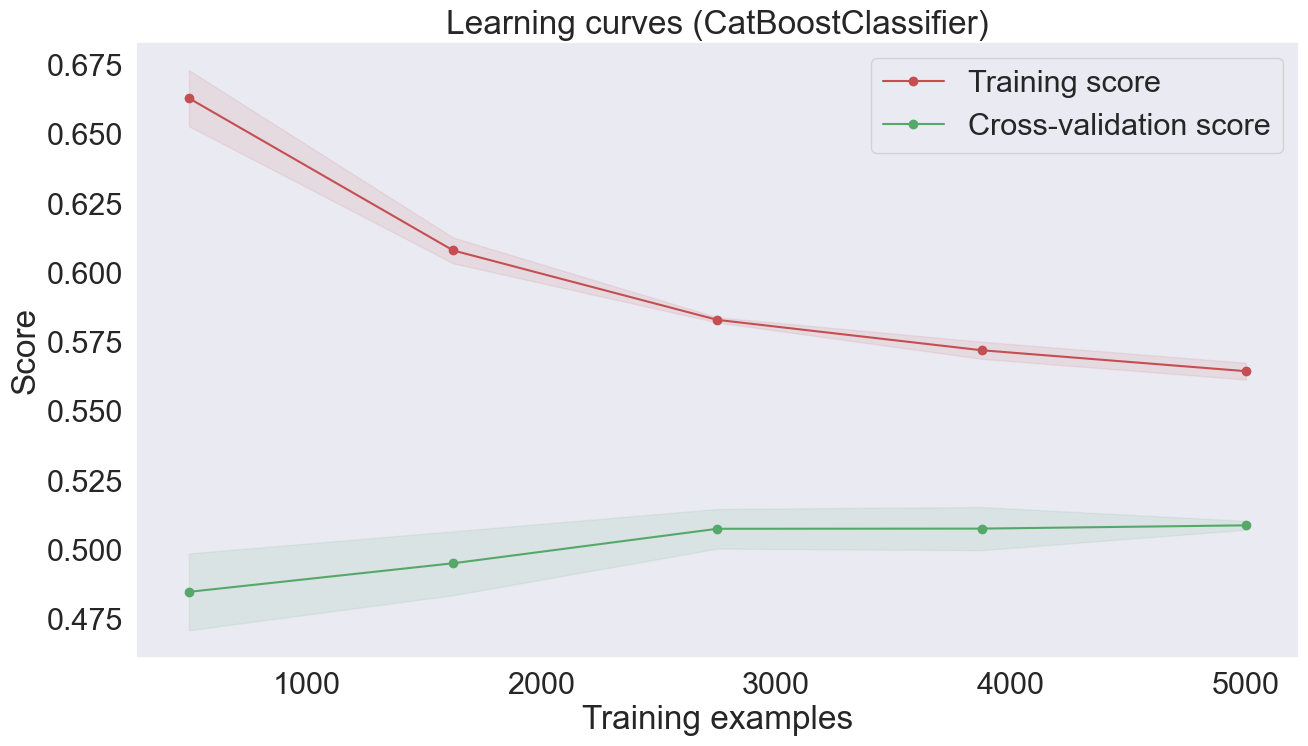

In [107]:
show_learning_curve_plot(final_model, X, y)

### Выбор порога вероятности для определения класса

In [108]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

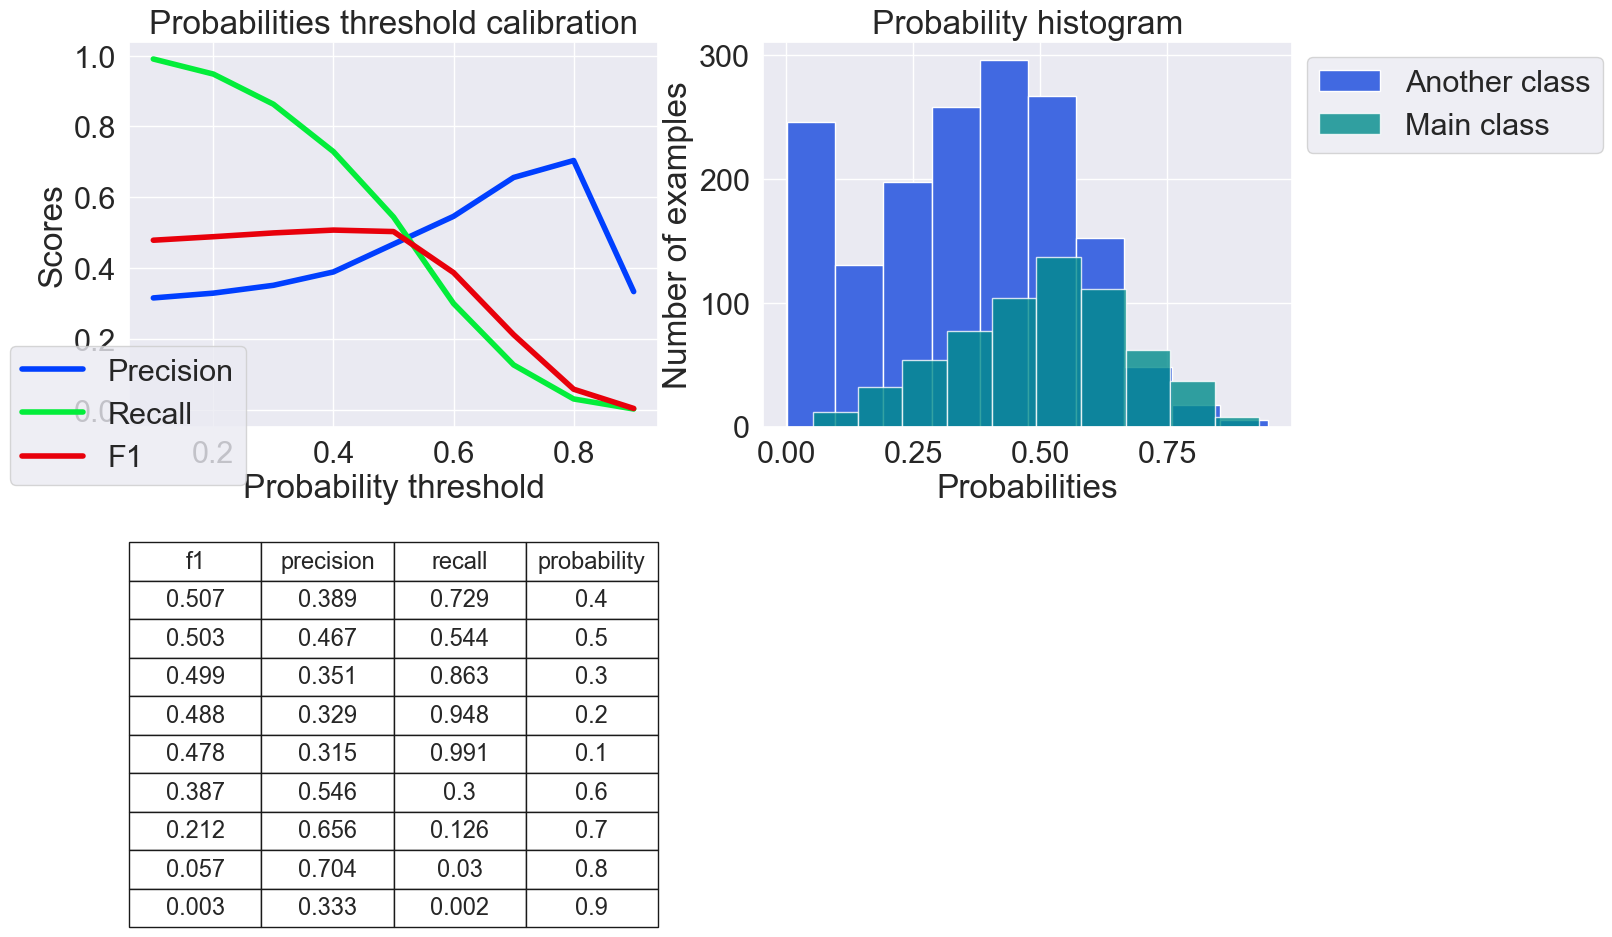

In [109]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

## Подготовка тестового датасета

In [146]:
   ## 'Months since last delinquent'
# Добавляется признак has_delay, всем наблюдениям присваивается 1
df_test['has_delay'] = 1
# По отсутствующей задолженности присваивается 0 в has_delay
df_test.loc[(df_test['Months since last delinquent'] == 0), 'has_delay'] = 0
# Заменяется NaN на 0 в 'Months since last delinquent'
df_test['Months since last delinquent'].fillna(0, inplace=True)

   ## 'Annual Income'
# Добавляется признак unknown_income, всем наблюдениям присваивается 0
df_test['unknown_income'] = 0
# В annual_income_median записываеся медианное значение дохода
annual_income_median = df_test['Annual Income'].median()
# В unknown_income по неизвестному доходу присваивается 1 
df_test.loc[(df_test['Annual Income'].isnull()), 'unknown_income'] = 1
# Пропуски дохода заполняются медианными значениями
df_test['Annual Income'].fillna(annual_income_median, inplace=True)

# Удаляется признак 'Number of Credit Problems'
df_test = df_test.drop(['Number of Credit Problems'], axis=1)

   ## 'Credit Score'
# Добавляется признак unknown_credit_score, всем наблюдениям присваивается 0
df_test['unknown_credit_score'] = 0
# В credit_score_median записываю медианное значение рейтинга
credit_score_median = df_test['Credit Score'].median()
# В unknown_credit_score по неизвестному рейтингу присваивается 1 
df_test.loc[(df_test['Credit Score'].isnull()), 'unknown_credit_score'] = 1
# Пропуски рейтинга заменяются медианными значениями
df_test['Credit Score'].fillna(credit_score_median, inplace=True)

# Обработка выброса- замена медианой значений выше 0.9 квантиля
Credit_Score_max_value = np.quantile(df_test['Credit Score'], q = 0.9)
condition = (df_test['Credit Score'] > Credit_Score_max_value)
df_test.loc[condition, 'Credit Score'] = df_test['Credit Score'].median()

  ## 'Bankruptcies'
df_test['Bankruptcies'].fillna(0 , inplace=True)

  ## 'Years in current job'
# Уникальные значения поля Years in current job
unique_years_in_current_job = df_test['Years in current job'].unique()
var_experiance = unique_years_in_current_job[1:]
# NaN заменяются рандомными значениями трудового стажа
df_test['Years in current job'].fillna(random.choice(var_experiance), inplace=True)

   ## 'Current Loan Amount'
# 99999999.0 в Current Loan Amount заменяются на медианные
median_current_loan_amount = df_test['Current Loan Amount'].median()
df_test.loc[(df_test['Current Loan Amount'] == 99999999.0), 'Current Loan Amount'] = median_current_loan_amount

   ## 'Term'
df_test['term_binary'] = df_test['Term'].map({'Short Term':'1', 'Long Term':'0'}).astype(int)

   ## 'Monthly Debt'
# Обработка выброса- замена медианой значений выше 0.975 квантиля    
Monthly_Debt_max_value = np.quantile(df_test['Monthly Debt'], q = 0.975)
condition = (df_test['Monthly Debt'] > Monthly_Debt_max_value)
df_test.loc[condition, 'Monthly Debt'] = df_test['Monthly Debt'].median()


# Приведение категориальных данных к строковому типу
for colname in ['Home Ownership', 'Years in current job', 'Purpose', 'Term']:
    df_test[colname] = df_test[colname].astype(str)    

NEW_FEATURE_NAMES = ['has_delay','unknown_income','unknown_credit_score']



#### Сохранение финальной модели

In [ ]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

In [ ]:
filename = 'T_Pochkareva_predictions.csv'



In [ ]:
df.to_csv(filename)